In [65]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
import cv2
from PIL import Image
from baseline import MultiMethod

/home/panding/code/UR/piv-data/baseline-multimodel/JHTDB_isotropic1024_hd_01994.npy


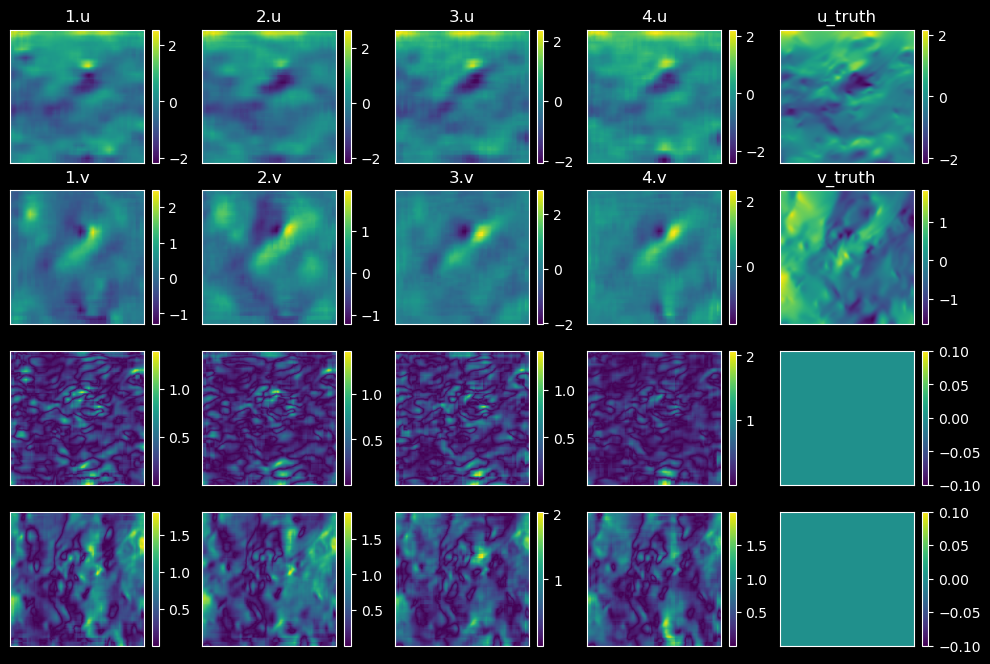

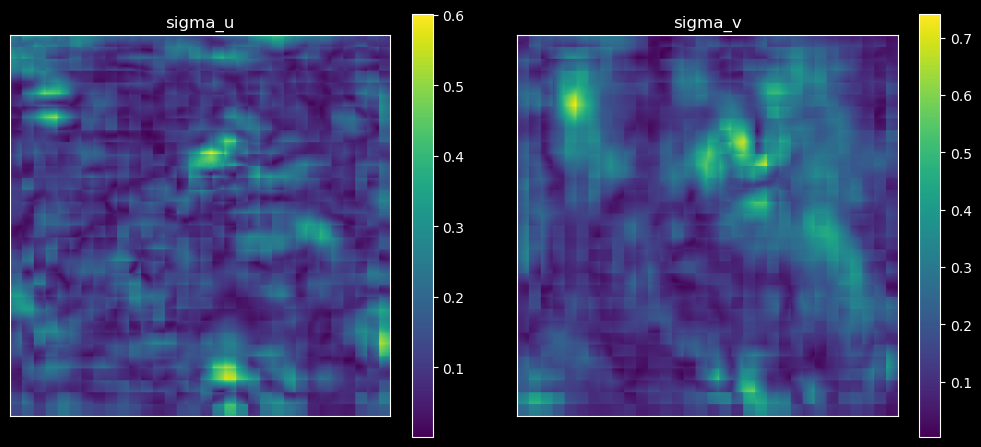

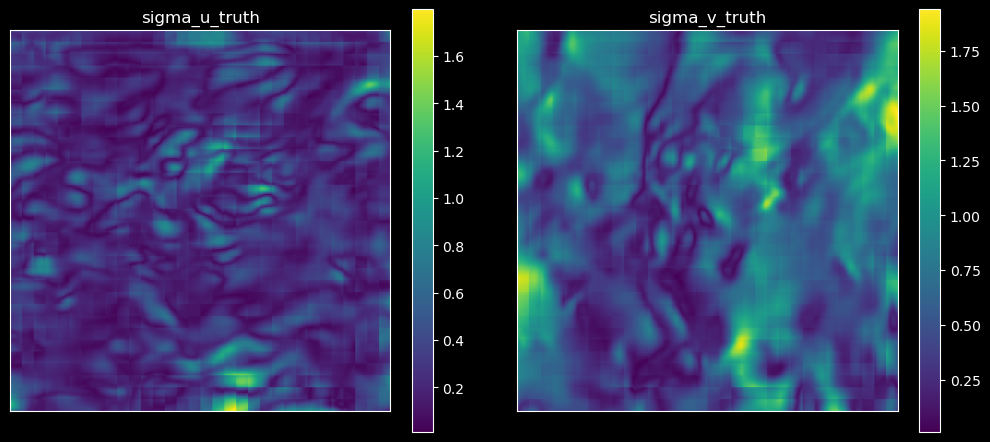

In [79]:
data_path = '/home/panding/code/UR/piv-data/baseline-multimodel'
datas = glob.glob(os.path.join(data_path, '*.npy'))
randomidx = np.random.permutation(len(datas))
datas = [datas[i] for i in randomidx]

baseline_1 = MultiMethod(datas[0], 0)
print(datas[0])
baseline_1.show()
sigma_u, sigma_v = baseline_1.std(show=1)
sigma_u_t, sigma_v_t = baseline_1.std_truth(show=1)

detransform has competed
/home/panding/code/UR/piv-data/baseline-multitransform/cylinder_Re300_00483.npy


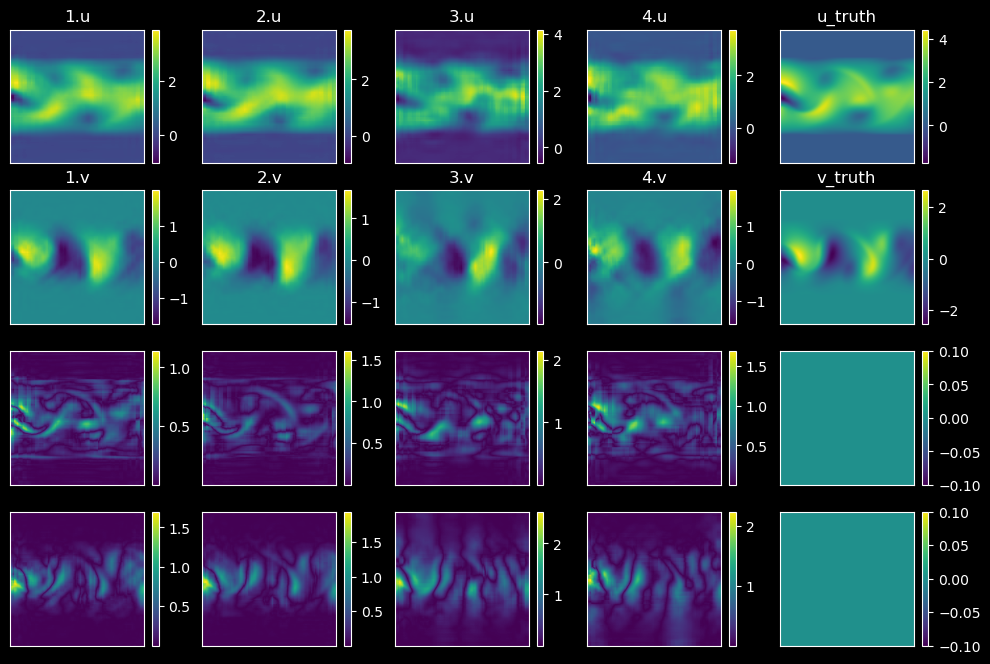

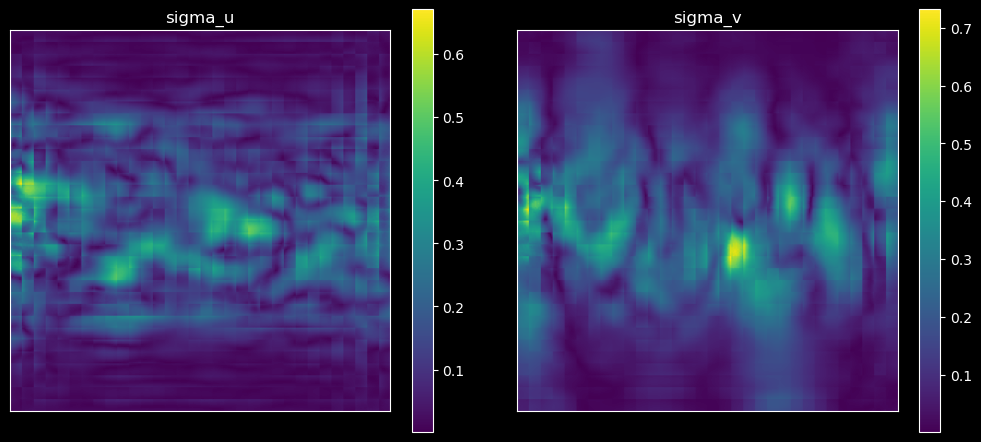

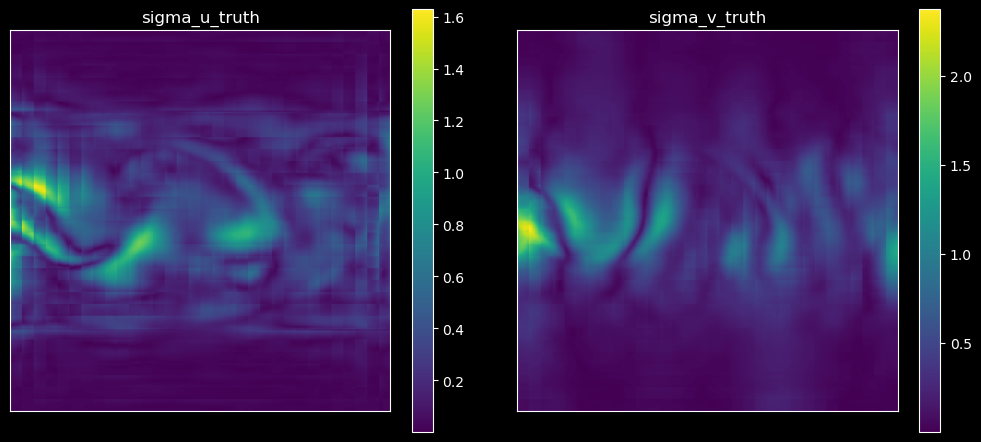

In [67]:
data_path = '/home/panding/code/UR/piv-data/baseline-multitransform'
datas = glob.glob(os.path.join(data_path, '*.npy'))
randomidx = np.random.permutation(len(datas))
datas = [datas[i] for i in randomidx]

baseline_1 = MultiMethod(datas[0], 1)
print(datas[0])
baseline_1.show()
sigma_u, sigma_v = baseline_1.std(show=1)
sigma_u_t, sigma_v_t = baseline_1.std_truth(show=1)

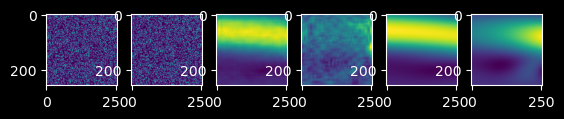

In [68]:
path = '/home/panding/code/UR/piv-data/ur/backstep_Re800_00380.npy'
data = np.load(path)
img = data[0]

img_rgb = np.zeros((256, 256, 3), dtype=np.float32)
img_rgb[:, :, 0] = img
img_rgb[:, :, 1] = img
img_rgb[:, :, 2] = img

plt.figure()
plt.subplot(161)
plt.imshow(data[0])
plt.subplot(162)
plt.imshow(data[1])
plt.subplot(163)
plt.imshow(data[2])
plt.subplot(164)
plt.imshow(data[3])
plt.subplot(165)
plt.imshow(data[4])
plt.subplot(166)
plt.imshow(data[5])
plt.show()